A Jupyter Widget

<IPython.core.display.Javascript object>


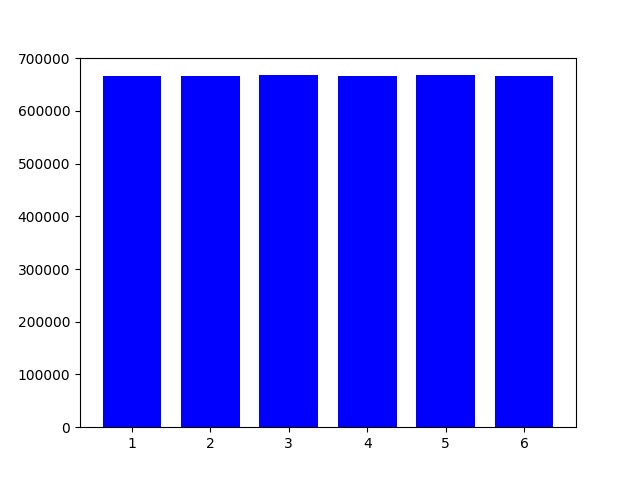

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from random import randint
from IPython.display import display

resultats = [0]*6
abscisses = [i+1 for i in range(6)]
nb_D6 = 1

def changeD6(change):
    global nb_D6
    nb_D6 = change['new']
    bouton.description = "Tirer "+str(nb_D6)+" D6"
txt_nb_D6 = widgets.IntText(value=nb_D6, description='Nb de D6 :', disabled=False)
txt_nb_D6.observe(changeD6, names='value')

def click(b):
    global resultats
    resultats = [x + y for x, y in zip(resultats, distrib(tirage(nb_D6)))]
    ax.clear()
    plt.bar(abscisses, resultats, .75, color="blue")
    fig.canvas.draw()
    txt_nb_tirages.value = str(sum(resultats))
bouton = widgets.Button(description="Tirer "+str(nb_D6)+" D6")
bouton.on_click(click)

txt_nb_tirages = widgets.IntText(value = sum(resultats), description='D6 tirés :')

display(widgets.HBox([txt_nb_D6, bouton, txt_nb_tirages]))

def tirage(nb=1):
    return [randint(1, 6) for _ in range(nb)]
    
def distrib(serie):
    return [serie.count(i+1) for i in range(6)]

fig = plt.figure()
ax = fig.add_subplot(111)

<IPython.core.display.Javascript object>


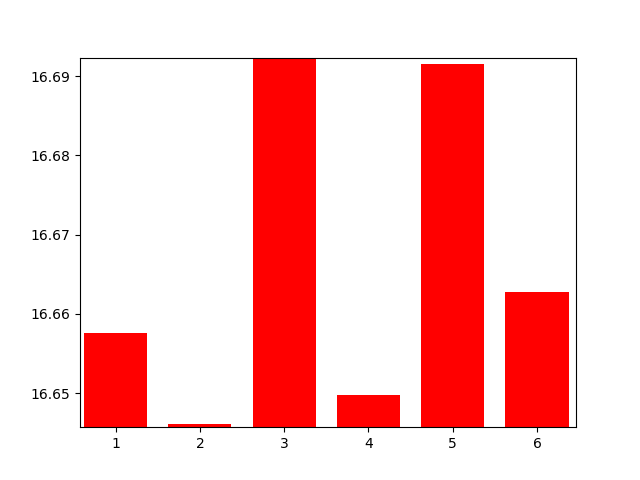

In [7]:
nb_lancers = sum(resultats)
frequences = list(map(lambda x: 100*x / nb_lancers, resultats))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.axis([0.5, 6.5, 0, 20])
plt.bar(abscisses, frequences, .75, color="red")
fig.canvas.draw()
